<a href="https://colab.research.google.com/github/profsong/ortools/blob/main/SOURCE_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 수요예측 예시
import pandas as pd
from prophet import Prophet

inputMethod = "data" # csv or data

if inputMethod=="csv":
  # sample data / daily data
  df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
elif inputMethod=="data":
  # sample data / monthly data / e-commerce transaction volume
  # https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10071
  monthlyECommerce = {"ds":["2021-10-01","2021-11-01","2021-12-01",
                            "2022-01-01","2022-02-01","2022-03-01",
                            "2022-04-01","2022-05-01","2022-06-01",
                            "2022-07-01","2022-08-01",
                            "2022-09-01","2022-10-01","2022-11-01",
                            "2022-12-01","2023-01-01","2023-02-01",
                            "2023-03-01","2023-04-01","2023-05-01",
                            "2023-06-01","2023-07-01","2023-08-01",
                            "2023-09-01","2023-10-01"],
                      "y":[16685954,17298059,18048329,
                           16855778,15749201,17608132,
                           16844576,17710119,17104747,
                           17332551,18008583,
                           17358050,17970891,18438854,
                           18897567,18042084,17041993,
                           18630111,17800541,19248111,
                           18468211,18836956,19076689,
                           19022051,20090523]}
  df = pd.DataFrame(monthlyECommerce)
else:
  print("inputMethod is either csv or data")

df.head()


,ds,y
0,2021-10-01,16685954
1,2021-11-01,17298059
2,2021-12-01,18048329
3,2022-01-01,16855778
4,2022-02-01,15749201


In [ ]:

m = Prophet()

m.fit(df)

# forecast frequency는 아래 링크 참조 (예시: 매월 1일은 MS, 매월 말인은 M, frequency 생략하면 daily)
# https://stackoverflow.com/questions/35339139/what-values-are-valid-in-pandas-freq-tags
future = m.make_future_dataframe(periods=6, freq='MS')

forecast = m.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()



INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdnk234_h/304tezxy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdnk234_h/6fljns8x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95299', 'data', 'file=/tmp/tmpdnk234_h/304tezxy.json', 'init=/tmp/tmpdnk234_h/6fljns8x.json', 'output', 'file=/tmp/tmpdnk234_h/prophet_model4ac7z9hz/prophet_model-20231208151626.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:16:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:16:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:

,ds,yhat,yhat_lower,yhat_upper
26,2023-12-01,2.086150e+07,2.072519e+07,2.099838e+07
27,2024-01-01,2.037610e+07,2.011403e+07,2.063407e+07
28,2024-02-01,1.969423e+07,1.927190e+07,2.008974e+07
29,2024-03-01,2.178883e+07,2.118615e+07,2.233115e+07
30,2024-04-01,2.129350e+07,2.050396e+07,2.203184e+07


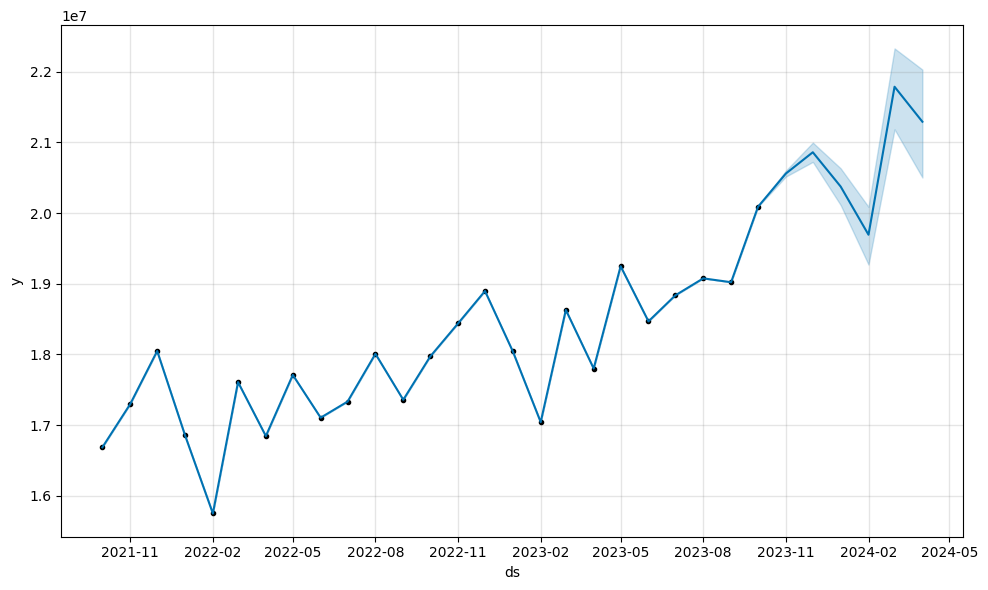

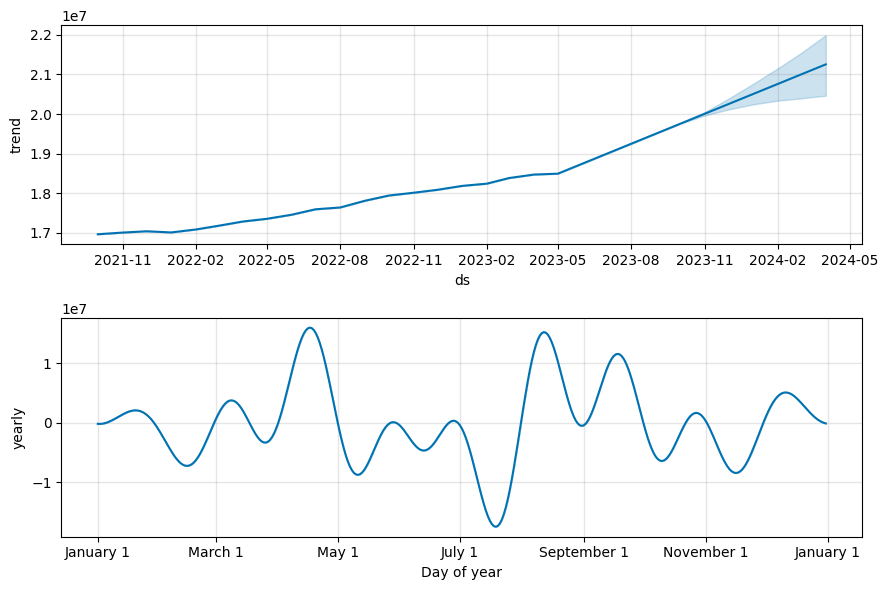

In [ ]:

fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)


In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)


In [ ]:
plot_components_plotly(m, forecast)
